In [36]:
#MOVIE RATING PREDICTION BY KANAK PRASAD

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
df = pd.read_csv(
    r"C:\Python\IMDb Movies India.csv",
    encoding="latin1"
)

print(df.head())
print(df.info())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [38]:
df = df[
    ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3", "Year", "Duration", "Rating"]
]

df = df.dropna(subset=["Rating"])

In [39]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Duration"] = df["Duration"].astype(str).str.extract("(\d+)").astype(float)

In [40]:
df["Actors"] = (
    df["Actor 1"].fillna("") + ", " +
    df["Actor 2"].fillna("") + ", " +
    df["Actor 3"].fillna("")
)

X = df[["Genre", "Director", "Actors", "Year", "Duration"]]
y = df["Rating"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [42]:
categorical_features = ["Genre", "Director", "Actors"]
numerical_features = ["Year", "Duration"]

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, categorical_features),
        ("num", numerical_pipeline, numerical_features)
    ]
)

In [43]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

c:\Users\kanak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.1260652011644516
RMSE: 1.426994769022317
R² Score: -0.09529591116984482


c:\Users\kanak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
new_movie = pd.DataFrame({
    "Genre": ["Drama"],
    "Director": ["Rajkumar Hirani"],
    "Actors": ["Aamir Khan"],
    "Year": [2014],
    "Duration": [170]
})

predicted_rating = model.predict(new_movie)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.916536916057684


c:\Users\kanak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


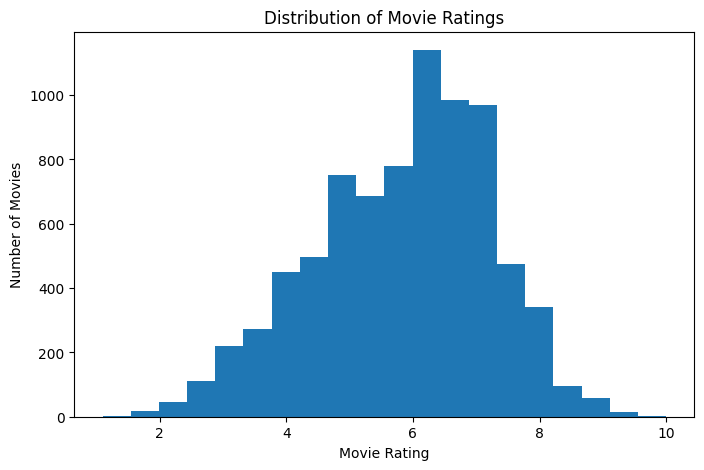

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Rating"], bins=20)
plt.xlabel("Movie Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()


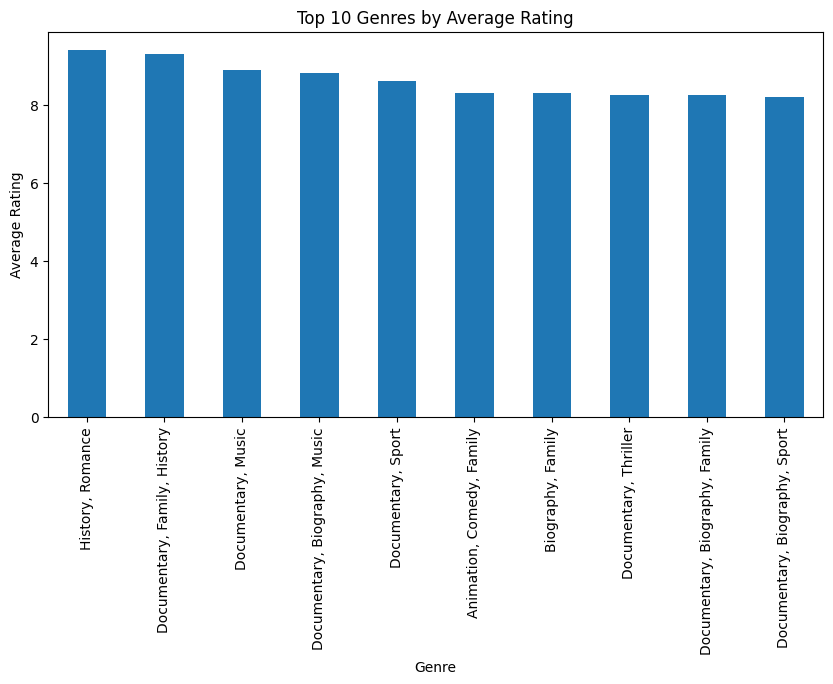

In [47]:
genre_rating = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
genre_rating.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top 10 Genres by Average Rating")
plt.show()
